## **Deep learning approaches for simile detection: Insights from BERT and LSTM**

**Similie Detection using Word Embeddings and Neural Network**

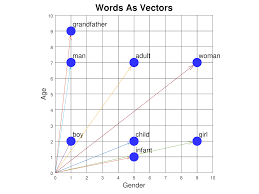

**BERT Model**
As opposed to directional models, which read the text input sequentially left-to-right or right-to-left), the Transformer encoder reads the entire sequence of words at once. Therefore it is considered bidirectional, though it would be more accurate to say that it’s non-directional. This characteristic allows the model to learn the context of a word based on all of its surroundings (left and right of the word.

*   BERT stands for Bidirectional Encoder Representations of Transformers.
*   It is a type of transformer model developed by Google.


*   BERT uses a transformer model with only encoding components.
*   In this code we are using BERT base model, it uses 12 encoding layers.


*   Each encoding layer consists of self attention layer and feet forward nueral network
*   The self attention layer consists of a number of attention heads.

*   BERT base (12 encoding layers, 768 feed forward layers, 12 attention heads)
*   3 different embeddings are used for input for training the BERT model.
1] Token embeddings (for converting words to vector)
2] Segment embeddings
3] Position embeddings









**BERT + LSTM (FINAL CODE)**


In [1]:
!pip install tensorflow

In [1]:
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from transformers import BertTokenizer, TFBertModel

# Step 1: Create the dataset with 50 similes and 50 non-similes
simile_sentences = [
    "He fights like a lion.", "Her smile was as bright as the sun.",
    "They were as busy as bees.", "He is as strong as an ox.",
    "Her eyes sparkled like stars.", "She danced like the wind.",
    "It spread like wildfire.", "He slept like a log.",
    "She sings like an angel.", "They shone like diamonds.",
    "His heart sank like a stone.", "She floated like a butterfly.",
    "His temper was as explosive as a volcano.", "She stood firm like a rock.",
    "Their love blossomed like a spring flower.", "He was sly like a fox.",
    "She shivered like a leaf.", "Time flew like an arrow.",
    "He hung his head like a dying flower.", "Her voice cracked like thunder.",
    "She exploded like a bomb.", "They fought like cats and dogs.",
    "His words cut like a knife.", "The stars twinkled like tiny eyes.",
    "He was as slippery as an eel.", "Her words stung like a bee.",
    "The sun beat down like a hammer.", "He was as cool as a cucumber.",
    "Her laughter rang out like bells.", "The car zoomed like a rocket.",
    "His patience was as thin as ice.", "He roared like a bear.",
    "She was as graceful as a swan.", "The clock ticked away like a time bomb.",
    "He watched like a hawk.", "She blossomed like a rose.",
    "His life unraveled like a thread.", "The baby cried like a siren.",
    "He ran like the wind.", "Her mind raced like a motor.",
    "His words flowed like honey.", "She struck like a snake.",
    "The news spread like a plague.", "He was as sneaky as a rat.",
    "She swayed like a tree in the wind.", "The clouds rolled in like an army.",
    "He hid like a mouse.", "Her touch was gentle like a dove.",
    "They sparkled like jewels.", "His anger erupted like a volcano."
]

non_simile_sentences = [
    "He fights very bravely.", "Her smile brightened the room.",
    "They were very busy throughout the day.", "He is extremely strong.",
    "Her eyes were very expressive.", "She danced gracefully.",
    "It spread rapidly.", "He slept deeply.",
    "She sings beautifully.", "They shone brightly.",
    "His heart sank quickly.", "She moved smoothly.",
    "His temper was explosive.", "She stood firmly.",
    "Their love grew.", "He was very clever.",
    "She trembled intensely.", "Time passed quickly.",
    "He was visibly sad.", "Her voice was loud.",
    "She reacted violently.", "They fought frequently.",
    "His words were harsh.", "The stars were visible.",
    "He was elusive.", "Her words were harsh.",
    "The sun was intense.", "He remained calm.",
    "Her laughter filled the room.", "The car moved fast.",
    "His patience was limited.", "He made a loud sound.",
    "She moved elegantly.", "The clock kept ticking.",
    "He observed carefully.", "She grew beautifully.",
    "His life changed.", "The baby was loud.",
    "He ran fast.", "Her thoughts were rapid.",
    "His words were smooth.", "She reacted quickly.",
    "The news became widespread.", "He was secretive.",
    "She moved smoothly.", "The clouds gathered.",
    "He was cautious.", "Her touch was soft.",
    "They were brilliant.", "His reaction was intense.",
    "He runs faster than the wind.",
    "Her smile was brighter than a thousand suns.",
    "His voice could shatter glass.",
    "He was buried under a mountain of work.",
    "She cried a river of tears.",
    "The car moved at the speed of light.",
    "He was so hungry he could eat a horse.",
    "Her heart was a frozen block of ice.",
    "She had a million things to do.",
    "His words cut deeper than a knife."
]

# Combine and label
sentences = simile_sentences + non_simile_sentences
labels = [1] * len(simile_sentences) + [0] * len(non_simile_sentences)

# Step 2: Shuffle the dataset
sentences, labels = shuffle(sentences, labels, random_state=42)

# Load pre-trained BERT and its tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

maxiLen = max([len(tokenizer.encode(sent)) for sent in sentences])

def bert_encode(texts, tokenizer, max_len=50):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            return_attention_mask=True,
            padding='max_length',
            truncation=True,
            return_tensors='tf'
        )

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    input_ids = tf.concat(input_ids, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)

    return input_ids, attention_masks

input_ids, attention_masks = bert_encode(sentences, tokenizer, max_len=maxiLen)

# Step 3: Define LSTM model which takes BERT embeddings as input
def create_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(maxiLen, 768)),  # 768 is the size of BERT-base embeddings
        Dropout(0.5),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
    return model

# Step 4: K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_loss, all_accuracy, all_precision, all_recall = [], [], [], []

for train_index, test_index in kf.split(input_ids):
    train_index, test_index = tf.convert_to_tensor(train_index), tf.convert_to_tensor(test_index)
    train_input_ids, test_input_ids = tf.gather(input_ids, train_index), tf.gather(input_ids, test_index)
    train_attention_masks, test_attention_masks = tf.gather(attention_masks, train_index), tf.gather(attention_masks, test_index)
    train_labels, test_labels = tf.gather(labels, train_index), tf.gather(labels, test_index)

    train_embeddings = bert_model(train_input_ids, attention_mask=train_attention_masks)[0]
    test_embeddings = bert_model(test_input_ids, attention_mask=test_attention_masks)[0]
    print("new fold")
    model = create_model()
    model.fit(train_embeddings, train_labels, epochs=30, validation_split=0.2, verbose=1)

    loss, accuracy, precision, recall = model.evaluate(test_embeddings, test_labels)
    all_loss.append(loss)
    all_accuracy.append(accuracy)
    all_precision.append(precision)
    all_recall.append(recall)

# Calculate average metrics
avg_loss = np.mean(all_loss)
avg_accuracy = np.mean(all_accuracy)
avg_precision = np.mean(all_precision)
avg_recall = np.mean(all_recall)
avg_f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)

print(f"Average Loss: {avg_loss}")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1_score}")

# Save the model
model.save('/content/simile_detection_model.h5')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

new fold


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.4402 - loss: 0.7022 - precision: 0.4145 - recall: 0.4818 - val_accuracy: 0.7222 - val_loss: 0.6640 - val_precision: 0.5455 - val_recall: 1.0000
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7133 - loss: 0.6429 - precision: 0.6301 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6684 - val_precision: 0.4000 - val_recall: 1.0000
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7250 - loss: 0.6149 - precision: 0.6356 - recall: 1.0000 - val_accuracy: 0.7778 - val_loss: 0.6076 - val_precision: 0.6000 - val_recall: 1.0000
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8654 - loss: 0.5428 - precision: 0.7966 - recall: 1.0000 - val_accuracy: 0.8889 - val_loss: 0.5402 - val_precision: 0.7500 - val_recall: 1.0000
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9369 - loss: 0.4907 - precision: 0.8855 - recall: 1.0000 - val_accuracy: 0.8889 - val_loss: 0.4832 - val_pre

Average Loss: 0.5081738844513893
Average Accuracy: 0.8909090876579284
Average Precision: 0.8264335751533508
Average Recall: 0.9595959663391114
Average F1 Score: 0.8880506248532433


Testing the LSTM Model Above

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Embeddings shape: (100, 50, 768)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predictions length: 100


<Figure size 1000x1000 with 0 Axes>

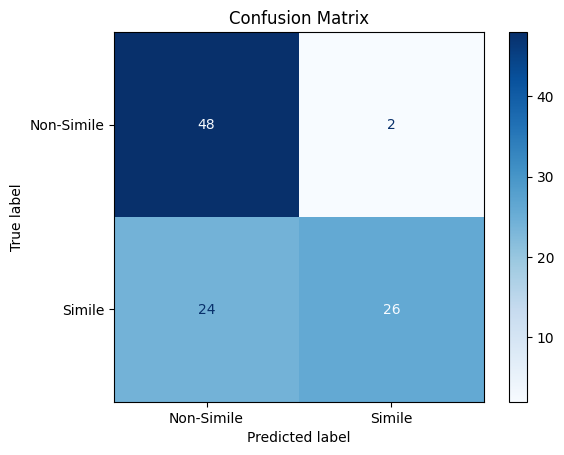

In [14]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define the test sentences and their labels
simile_sentences = [
    "She moved through the crowd like a ghost, unnoticed and silent.",
    "The car's engine roared like a lion when it started.",
    "His lies spread like a virus, infecting everyone with doubt.",
    "She shone in the room like a lone star in the night sky.",
    "The rumors flew through the town like leaves in a storm.",
    "Her voice was smooth like velvet, soothing and soft.",
    "Time passed like molasses in winter, slow and thick.",
    "His mind raced like a high-speed train, full of thoughts.",
    "The lights flickered like the heartbeat of a giant, unsteady and sporadic.",
    "He approached the problem like a surgeon, with precision and care.",
    "The days rolled by like waves on a beach, constant and rhythmic.",
    "Their laughter was like music, filling the room with joy.",
    "His anger boiled up like a pot on the stove, ready to spill over.",
    "Her questions poked holes in his argument like needles in cloth.",
    "He ran faster than the wind, which is like saying he was very fast.",
    "She sang beautifully, almost like a professional opera singer.",
    "It looked like rain, but the clouds were deceitful.",
    "The silence in the room was like a thick wall, impenetrable and solid.",
    "His victory was like a scripted play, every move perfectly planned.",
    "Memories washed over her like waves on the sand.",
    "He was quick like a cat pouncing on its prey.",
    "The stars shone like tiny beacons in the vast darkness.",
    "She handled the situation like a master chess player.",
    "The building towered over the city like a giant.",
    "The engine hummed like a happy bee.",
    "His thoughts scattered like leaves in a storm.",
    "She danced through life like a leaf on the wind.",
    "His smile lit up the room like a beacon in the night.",
    "The team worked together like a well-oiled machine.",
    "Her laughter echoed like music through the halls.",
    "He stormed in like a hurricane, ready to destroy everything.",
    "The baby’s cries were like sirens in the night.",
    "Her eyes sparkled like gems under the store lights.",
    "The car slid on the ice like a dancer on a stage.",
    "His heart raced like a drumbeat in his chest.",
    "She shivered like a leaf in the wind.",
    "The sun set like a curtain falling on the day.",
    "His voice cracked like dry earth under the sun.",
    "The rumors swirled around her like a cloak.",
    "The days melded together like colors in a painting.",
    "His laughter was infectious, spreading like wildfire.",
    "Her words fell like rain in a drought.",
    "The silence was thick like fog.",
    "He slipped into the crowd like a ghost.",
    "Their handshake was firm, like a binding contract.",
    "The news hit them like a slap in the face.",
    "The flowers bloomed like a smile across the earth.",
    "Her smile was as bright as the sun, lighting up the room.",
    "The decision hung in the air like a heavy fog.",
    "She glided across the room like a swan on a lake."
]

non_simile_sentences = [
    "The computer operates efficiently under pressure.",
    "Her dress was the color of the midnight sky, dark and deep.",
    "They completed the project with great enthusiasm.",
    "The tree stands tall in the meadow, casting a long shadow.",
    "He spoke in a tone that was both firm and gentle.",
    "She had a heart of gold, always ready to help anyone in need.",
    "The book was a doorway to another world, full of adventure and mystery.",
    "He was a night owl, working best in the quiet hours after midnight.",
    "The car was a red blur as it sped down the highway.",
    "The dog barked loudly when strangers approached.",
    "She worked tirelessly through the night.",
    "The document was lengthy and detailed.",
    "They greeted him with warm smiles.",
    "The meal was delicious and satisfying.",
    "He adjusted his glasses and continued reading.",
    "The flowers bloomed brilliantly in the spring.",
    "The painting depicted a serene landscape.",
    "He typed quickly and efficiently.",
    "The children played happily in the park.",
    "She wore a striking blue dress to the event.",
    "The meeting was long and tiring.",
    "The lecture covered a lot of material.",
    "He always speaks in a calm and collected manner.",
    "The solution to the problem was simpler than expected.",
    "The report was thorough and detailed.",
    "He jogged every morning to stay fit.",
    "The building was tall and imposing.",
    "She typed her essay on her new computer.",
    "They celebrated their victory with a party.",
    "The book was placed on the top shelf.",
    "He cleaned his room before his guests arrived.",
    "She painted the walls a bright blue.",
    "The conference lasted all day.",
    "He missed the bus and had to walk.",
    "She organized her notes for the meeting.",
    "The window was left open overnight.",
    "They listened intently to the lecture.",
    "He turned off the lights before leaving.",
    "She adjusted the rearview mirror before driving.",
    "The garden was well-maintained and tidy.",
    "He adjusted the thermostat to cool the room.",
    "She measured the ingredients carefully for the recipe.",
    "The film started at eight o'clock.",
    "He watched the sunset from the balcony.",
    "She completed the application carefully.",
    "The cat slept in the sunny spot on the carpet.",
    "He took a deep breath and dived into the pool.",
    "She checked her email one last time before bed.",
    "The meeting was scheduled for ten in the morning.",
    "Reach here as soon as possible."
]

# Combine sentences and labels
sentences = simile_sentences + non_simile_sentences
labels = [1] * 50 + [0] * 50  # True labels

# Function to encode sentences and get embeddings
def get_bert_embeddings(sentences, tokenizer, bert_model, max_len=50):
    input_ids = []
    attention_masks = []

    for sentence in sentences:
        encoded = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_len,
            return_attention_mask=True,
            padding='max_length',
            truncation=True,
            return_tensors='tf'
        )

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    input_ids = tf.concat(input_ids, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)

    # Generate embeddings using BERT
    embeddings = bert_model(input_ids, attention_mask=attention_masks)[0]  # The output is a tuple, [0] gives the embeddings
    return embeddings

# Encode the sentences and get embeddings
embeddings = get_bert_embeddings(sentences, tokenizer, bert_model)
print(f"Embeddings shape: {embeddings.shape}")

# Load your trained LSTM model if not already loaded
model = load_model('/content/simile_detection_model.h5')

# Predict using the embeddings
predictions = model.predict(embeddings)
predictions = (predictions > 0.5).astype(int).flatten()
print(f"Predictions length: {len(predictions)}")

# Generate and display the confusion matrix
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Simile', 'Simile'])
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### BERTtokenizer + Fully Connected Layer


Model Training + Confusion Matrix


Fold 1
Epoch 1, Loss: 0.6934, Precision: 0.4091, Recall: 0.2308, F1: 0.2951
Epoch 2, Loss: 0.6297, Precision: 0.9091, Recall: 0.2564, F1: 0.4000
Epoch 3, Loss: 0.4733, Precision: 0.8605, Recall: 0.9487, F1: 0.9024
Epoch 4, Loss: 0.2702, Precision: 0.9512, Recall: 1.0000, F1: 0.9750
Epoch 5, Loss: 0.1546, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Epoch 6, Loss: 0.0887, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Epoch 7, Loss: 0.0554, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Epoch 8, Loss: 0.0330, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Epoch 9, Loss: 0.0235, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Epoch 10, Loss: 0.0174, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test Accuracy: 0.9545, Precision: 0.9167, Recall: 1.0000, F1 Score: 0.9565
Model saved to ./bert_models/model_fold_1.pth
Fold 2
Epoch 1, Loss: 0.6891, Precision: 0.4750, Recall: 0.4524, F1: 0.4634
Epoch 2, Loss: 0.5929, Precision: 0.8537, Recall: 0.8333, F1: 0.8434
Epoch 3, Loss: 0.4334, Precision: 0.

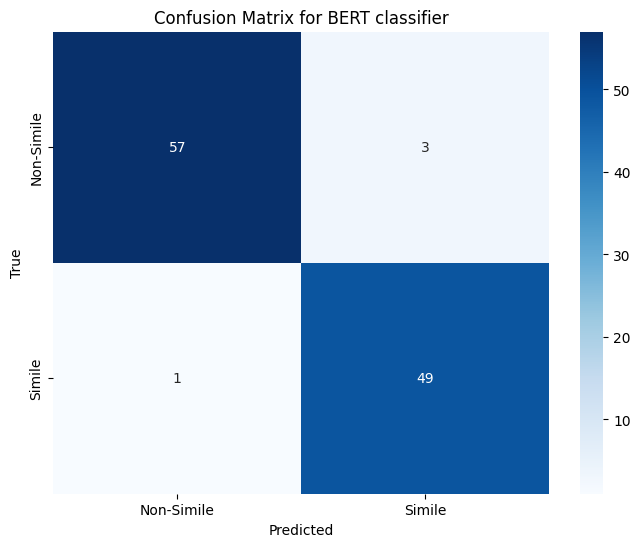

<ipython-input-10-780d9bd32945>:251: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Sentence: "She swims like a fish."
Predicted Label: Simile
Probability (Simile): 0.9640


In [10]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from torch.utils.data import DataLoader, Dataset
import random
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Data generated by AI
simile_sentences = [
    "He fights like a lion.", "Her smile was as bright as the sun.",
    "They were as busy as bees.", "He is as strong as an ox.",
    "Her eyes sparkled like stars.", "She danced like the wind.",
    "It spread like wildfire.", "He slept like a log.",
    "She sings like an angel.", "They shone like diamonds.",
    "His heart sank like a stone.", "She floated like a butterfly.",
    "His temper was as explosive as a volcano.", "She stood firm like a rock.",
    "Their love blossomed like a spring flower.", "He was sly like a fox.",
    "She shivered like a leaf.", "Time flew like an arrow.",
    "He hung his head like a dying flower.", "Her voice cracked like thunder.",
    "She exploded like a bomb.", "They fought like cats and dogs.",
    "His words cut like a knife.", "The stars twinkled like tiny eyes.",
    "He was as slippery as an eel.", "Her words stung like a bee.",
    "The sun beat down like a hammer.", "He was as cool as a cucumber.",
    "Her laughter rang out like bells.", "The car zoomed like a rocket.",
    "His patience was as thin as ice.", "He roared like a bear.",
    "She was as graceful as a swan.", "The clock ticked away like a time bomb.",
    "He watched like a hawk.", "She blossomed like a rose.",
    "His life unraveled like a thread.", "The baby cried like a siren.",
    "He ran like the wind.", "Her mind raced like a motor.",
    "His words flowed like honey.", "She struck like a snake.",
    "The news spread like a plague.", "He was as sneaky as a rat.",
    "She swayed like a tree in the wind.", "The clouds rolled in like an army.",
    "He hid like a mouse.", "Her touch was gentle like a dove.",
    "They sparkled like jewels.", "His anger erupted like a volcano."
]

non_simile_sentences = [
    "He fights very bravely.", "Her smile brightened the room.",
    "They were very busy throughout the day.", "He is extremely strong.",
    "Her eyes were very expressive.", "She danced gracefully.",
    "It spread rapidly.", "He slept deeply.",
    "She sings beautifully.", "They shone brightly.",
    "His heart sank quickly.", "She moved smoothly.",
    "His temper was explosive.", "She stood firmly.",
    "Their love grew.", "He was very clever.",
    "She trembled intensely.", "Time passed quickly.",
    "He was visibly sad.", "Her voice was loud.",
    "She reacted violently.", "They fought frequently.",
    "His words were harsh.", "The stars were visible.",
    "He was elusive.", "Her words were harsh.",
    "The sun was intense.", "He remained calm.",
    "Her laughter filled the room.", "The car moved fast.",
    "His patience was limited.", "He made a loud sound.",
    "She moved elegantly.", "The clock kept ticking.",
    "He observed carefully.", "She grew beautifully.",
    "His life changed.", "The baby was loud.",
    "He ran fast.", "Her thoughts were rapid.",
    "His words were smooth.", "She reacted quickly.",
    "The news became widespread.", "He was secretive.",
    "She moved smoothly.", "The clouds gathered.",
    "He was cautious.", "Her touch was soft.",
    "They were brilliant.", "His reaction was intense.",
    "He runs faster than the wind.",
    "Her smile was brighter than a thousand suns.",
    "His voice could shatter glass.",
    "He was buried under a mountain of work.",
    "She cried a river of tears.",
    "The car moved at the speed of light.",
    "He was so hungry he could eat a horse.",
    "Her heart was a frozen block of ice.",
    "She had a million things to do.",
    "His words cut deeper than a knife."
]

# Combine and label
sentences = simile_sentences + non_simile_sentences
labels = [1] * len(simile_sentences) + [0] * len(non_simile_sentences)
combined = list(zip(sentences, labels))
random.shuffle(combined)
sentences, labels = zip(*combined)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = max([len(tokenizer.encode(sent)) for sent in sentences])

class SimileDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_len):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            sentence, add_special_tokens=True, max_length=self.max_len,
            padding='max_length', truncation=True, return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Model with BERT
class BertClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        return self.fc(pooled_output)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholders for results
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Placeholders for true and predicted labels
all_true_labels = []
all_pred_labels = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Directory to save models
model_dir = './bert_models'
os.makedirs(model_dir, exist_ok=True)

# Evaluate the model function
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            probs = torch.softmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    return accuracy, precision, recall, f1, all_labels, all_preds

# Update the train_model function to log metrics
def train_model(model, data_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        all_preds = []
        all_labels = []
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        # Metrics calculation
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(data_loader):.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

# Train the model and collect epoch statistics
num_epochs = 10

for fold, (train_index, test_index) in enumerate(kf.split(sentences)):
    print(f"Fold {fold+1}")

    train_sentences = [sentences[i] for i in train_index]
    test_sentences = [sentences[i] for i in test_index]
    train_labels = [labels[i] for i in train_index]
    test_labels = [labels[i] for i in test_index]

    train_data = SimileDataset(train_sentences, train_labels, tokenizer, max_len)
    test_data = SimileDataset(test_sentences, test_labels, tokenizer, max_len)
    train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

    model = BertClassifier('bert-base-uncased', num_classes=2)
    model = model.to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
    criterion = nn.CrossEntropyLoss()

    train_model(model, train_loader, criterion, optimizer, num_epochs)

    test_accuracy, test_precision, test_recall, test_f1, test_labels, test_preds = evaluate_model(model, test_loader)
    print(f'Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}')

    accuracies.append(test_accuracy)
    precisions.append(test_precision)
    recalls.append(test_recall)
    f1_scores.append(test_f1)

    # Append true and predicted labels for the whole model evaluation
    all_true_labels.extend(test_labels)
    all_pred_labels.extend(test_preds)

    model_path = os.path.join(model_dir, f'model_fold_{fold+1}.pth')
    torch.save(model.state_dict(), model_path)
    print(f'Model saved to {model_path}')

print(f'Average Test Accuracy: {np.mean(accuracies):.4f}')
print(f'Average Precision: {np.mean(precisions):.4f}')
print(f'Average Recall: {np.mean(recalls):.4f}')
print(f'Average F1 Score: {np.mean(f1_scores):.4f}')

# Confusion matrix for the whole model
cm = confusion_matrix(all_true_labels, all_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Simile', 'Simile'], yticklabels=['Non-Simile', 'Simile'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for BERT classifier')
plt.show()

# Example of loading a model for future predictions
def load_model(model_path, device):
    model = BertClassifier('bert-base-uncased', num_classes=2)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    return model

# Load a specific fold model for prediction
fold_model_path = os.path.join(model_dir, 'model_fold_1.pth')
loaded_model = load_model(fold_model_path, device)

# Example prediction function
def predict(sentence, model, tokenizer, max_len, device):
    model.eval()
    encoding = tokenizer.encode_plus(
        sentence, add_special_tokens=True, max_length=max_len,
        padding='max_length', truncation=True, return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
    return preds.cpu().numpy()[0]

# Predicting on a new sentence
sentence = "She swims like a fish."
input_ids = tokenizer.encode(sentence, add_special_tokens=True, max_length=max_len, padding='max_length', truncation=True, return_tensors='pt').to(device)
with torch.no_grad():
    outputs = model(input_ids, attention_mask=(input_ids != tokenizer.pad_token_id))
    probs = torch.softmax(outputs, dim=1)
    _, prediction = torch.max(outputs, dim=1)
prediction_label = "Simile" if prediction.item() == 1 else "Non-Simile"
print(f'Sentence: "{sentence}"')
print(f'Predicted Label: {prediction_label}')
print(f'Probability (Simile): {probs[0, 1].item():.4f}')

Testing the BERT + Fully Connected Layer model above

<ipython-input-19-e5b42f968b64>:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))  # Load PyTorch model


Custom Test Accuracy: 0.9700
Custom Test Precision: 0.9608
Custom Test Recall: 0.9800
Custom Test F1 Score: 0.9703


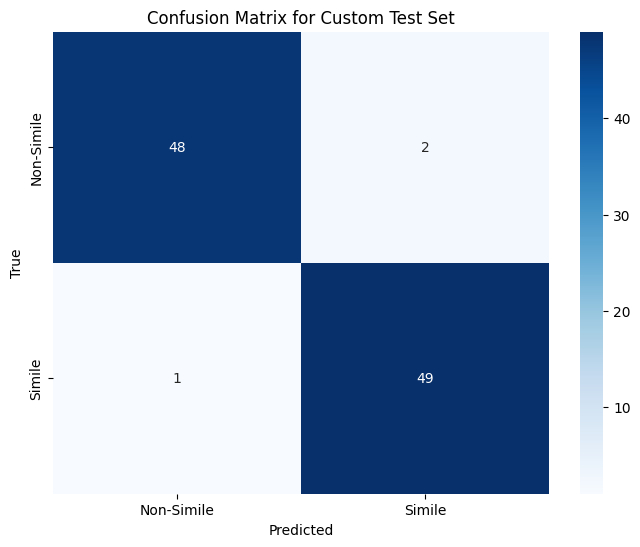

In [19]:
# Define custom test sentences
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            probs = torch.softmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    return accuracy, precision, recall, f1, all_labels, all_preds
custom_simile_sentences = [
    "She moved through the crowd like a ghost, unnoticed and silent.",
    "The car's engine roared like a lion when it started.",
    "His lies spread like a virus, infecting everyone with doubt.",
    "She shone in the room like a lone star in the night sky.",
    "The rumors flew through the town like leaves in a storm.",
    "Her voice was smooth like velvet, soothing and soft.",
    "Time passed like molasses in winter, slow and thick.",
    "His mind raced like a high-speed train, full of thoughts.",
    "The lights flickered like the heartbeat of a giant, unsteady and sporadic.",
    "He approached the problem like a surgeon, with precision and care.",
    "The days rolled by like waves on a beach, constant and rhythmic.",
    "Their laughter was like music, filling the room with joy.",
    "His anger boiled up like a pot on the stove, ready to spill over.",
    "Her questions poked holes in his argument like needles in cloth.",
    "He ran faster than the wind, which is like saying he was very fast.",
    "She sang beautifully, almost like a professional opera singer.",
    "It looked like rain, but the clouds were deceitful.",
    "The silence in the room was like a thick wall, impenetrable and solid.",
    "His victory was like a scripted play, every move perfectly planned.",
    "Memories washed over her like waves on the sand.",
    "He was quick like a cat pouncing on its prey.",
    "The stars shone like tiny beacons in the vast darkness.",
    "She handled the situation like a master chess player.",
    "The building towered over the city like a giant.",
    "The engine hummed like a happy bee.",
    "His thoughts scattered like leaves in a storm.",
    "She danced through life like a leaf on the wind.",
    "His smile lit up the room like a beacon in the night.",
    "The team worked together like a well-oiled machine.",
    "Her laughter echoed like music through the halls.",
    "He stormed in like a hurricane, ready to destroy everything.",
    "The baby’s cries were like sirens in the night.",
    "Her eyes sparkled like gems under the store lights.",
    "The car slid on the ice like a dancer on a stage.",
    "His heart raced like a drumbeat in his chest.",
    "She shivered like a leaf in the wind.",
    "The sun set like a curtain falling on the day.",
    "His voice cracked like dry earth under the sun.",
    "The rumors swirled around her like a cloak.",
    "The days melded together like colors in a painting.",
    "His laughter was infectious, spreading like wildfire.",
    "Her words fell like rain in a drought.",
    "The silence was thick like fog.",
    "He slipped into the crowd like a ghost.",
    "Their handshake was firm, like a binding contract.",
    "The news hit them like a slap in the face.",
    "The flowers bloomed like a smile across the earth.",
    "Her smile was as bright as the sun, lighting up the room.",
    "The decision hung in the air like a heavy fog.",
    "She glided across the room like a swan on a lake."
]

custom_non_simile_sentences = [
    "The computer operates efficiently under pressure.",
    "Her dress was the color of the midnight sky, dark and deep.",
    "They completed the project with great enthusiasm.",
    "The tree stands tall in the meadow, casting a long shadow.",
    "He spoke in a tone that was both firm and gentle.",
    "She had a heart of gold, always ready to help anyone in need.",
    "The book was a doorway to another world, full of adventure and mystery.",
    "He was a night owl, working best in the quiet hours after midnight.",
    "The car was a red blur as it sped down the highway.",
    "The dog barked loudly when strangers approached.",
    "She worked tirelessly through the night.",
    "The document was lengthy and detailed.",
    "They greeted him with warm smiles.",
    "The meal was delicious and satisfying.",
    "He adjusted his glasses and continued reading.",
    "The flowers bloomed brilliantly in the spring.",
    "The painting depicted a serene landscape.",
    "He typed quickly and efficiently.",
    "The children played happily in the park.",
    "She wore a striking blue dress to the event.",
    "The meeting was long and tiring.",
    "The lecture covered a lot of material.",
    "He always speaks in a calm and collected manner.",
    "The solution to the problem was simpler than expected.",
    "The report was thorough and detailed.",
    "He jogged every morning to stay fit.",
    "The building was tall and imposing.",
    "She typed her essay on her new computer.",
    "They celebrated their victory with a party.",
    "The book was placed on the top shelf.",
    "He cleaned his room before his guests arrived.",
    "She painted the walls a bright blue.",
    "The conference lasted all day.",
    "He missed the bus and had to walk.",
    "She organized her notes for the meeting.",
    "The window was left open overnight.",
    "They listened intently to the lecture.",
    "He turned off the lights before leaving.",
    "She adjusted the rearview mirror before driving.",
    "The garden was well-maintained and tidy.",
    "He adjusted the thermostat to cool the room.",
    "She measured the ingredients carefully for the recipe.",
    "The film started at eight o'clock.",
    "He watched the sunset from the balcony.",
    "She completed the application carefully.",
    "The cat slept in the sunny spot on the carpet.",
    "He took a deep breath and dived into the pool.",
    "She checked her email one last time before bed.",
    "The meeting was scheduled for ten in the morning.",
    "Reach here as soon as possible."
]

# Combine and label
custom_sentences = custom_simile_sentences + custom_non_simile_sentences
custom_labels = [1] * len(custom_simile_sentences) + [0] * len(custom_non_simile_sentences)

# Create dataset and DataLoader
custom_test_data = SimileDataset(custom_sentences, custom_labels, tokenizer, max_len)
custom_test_loader = DataLoader(custom_test_data, batch_size=8, shuffle=False)

# Load the trained model (change the fold model path as needed)
# Load the trained model
def load_model(model_path, device):
    model = BertClassifier('bert-base-uncased', num_classes=2)
    model.load_state_dict(torch.load(model_path, map_location=device))  # Load PyTorch model
    model = model.to(device)
    model.eval()
    return model

fold_model_path = os.path.join(model_dir, 'model_fold_1.pth')
model = load_model(fold_model_path, device)


# Evaluate the model on the custom test set
custom_accuracy, custom_precision, custom_recall, custom_f1, custom_true_labels, custom_pred_labels = evaluate_model(model, custom_test_loader)

# Print evaluation results
print(f'Custom Test Accuracy: {custom_accuracy:.4f}')
print(f'Custom Test Precision: {custom_precision:.4f}')
print(f'Custom Test Recall: {custom_recall:.4f}')
print(f'Custom Test F1 Score: {custom_f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(custom_true_labels, custom_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Simile', 'Simile'], yticklabels=['Non-Simile', 'Simile'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Custom Test Set')
plt.show()


TESTING BERT + FC Model Above

In [ ]:

# Predicting on a new sentence
sentence = "She swims like a fish."
input_ids = tokenizer.encode(sentence, add_special_tokens=True, max_length=max_len, padding='max_length', truncation=True, return_tensors='pt').to(device)
with torch.no_grad():
    outputs = model(input_ids, attention_mask=(input_ids != tokenizer.pad_token_id))
    probs = torch.softmax(outputs, dim=1)
    _, prediction = torch.max(outputs, dim=1)
prediction_label = "Simile" if prediction.item() == 1 else "Non-Simile"
print(f'Sentence: "{sentence}"')
print(f'Predicted Label: {prediction_label}')
print(f'Probability (Simile): {probs[0, 1].item():.4f}')

Sentence: "She moved through the crowd like a ghost, unnoticed and silent"
Predicted Label: Simile
Probability (Simile): 0.9659
